# Classification

## Linear Models for Classifcation
In this module, we will learn about classification where the task is to predict the class or category. Both regression and classification are the main two types of supervised learning. 

## Problem Formulation
You have a dataset containing the features of mobiles and the problem is to predict the price range, not the exact price.

## Data Information
The data is divided into two parts (i) "m13_train.csv" and (ii) "m13_test.csv".

Here are the details of the features. The data has 21 features. The target feature is `price range` and it has four price ranges: `0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).`

* **batter_power**: Total energy a battery can store in one time measured in mAh
* **blue**: Has bluetooth or not
* **clock_speed**: speed at which microprocessor executes instructions
* **dual_sim**: Has dual sim support or not
* **fc**: Front Camera mega pixels
* **four_g**: Has 4G or not
* **int_memory**: Internal Memory in Gigabytes
* **m_dep**: Mobile Depth in cm
* **mobile_wt**: Weight of mobile phone
* **n_cores**: Number of cores of processor
* **pc**: Primary Camera mega pixels
* **px_height**: Pixel Resolution Height
* **px_width**: Pixel Resolution Width
* **ram**: Random Access Memory in Mega Bytes
* **sc_h**: Screen Height of mobile in cm
* **sc_w**: Screen Width of mobile in cm
* **talk_time**: longest time that a single battery charge will last when you are talking
* **three_g**: Has 3G or not
* **touch_screen**: Has touch screen or not
* **wifi**: Has wifi or not
* **price_range**: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
# Task 1:
# Import required libraries i.e. numpy, pandas, seaborn, matplotlib.pyplot etc.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Task 2:
# Read the "m13_train.csv" file into a pandas datafrome named "mobile_train" and show its first 5 rows.
mobile_train = pd.read_csv("m13_train.csv")
mobile_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# Task 3:
# Read the "m13_test.csv" file into a pandas datafrome named "mobile_test" and show its first 5 rows.
mobile_test = pd.read_csv("m13_test.csv")
mobile_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [4]:
# Task 4:
# Show the tail of the train data
mobile_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
# Task 5: 
# Get the info of the train data
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Task 6:
# Print the lengths of the train and test data.
print('The size of the train data is: {}\nThe size of the test data is: {}'.format(len(mobile_train), len(mobile_test)))

The size of the train data is: 2000
The size of the test data is: 1000


In [7]:
# Task 7:
# Determine the total number of columns or features
len(mobile_train.columns)

21

## Exploratory Data Analysis

In [8]:
# Task 8:
# Make a copy of the mobile_train data and name it train_data
train_data = mobile_train.copy()

In [9]:
# Task 9:
# Check the summary statistics of mobile_train data by describe method
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
# Task 10:
# Check for missing values in mobile_train data
mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
# Task 11:
# Check the correlation between the features of mobile_train data and the label "price_range"
# Which variable is strongly correlated to the output label?
correlation = mobile_train.corr()
correlation['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

<Axes: >

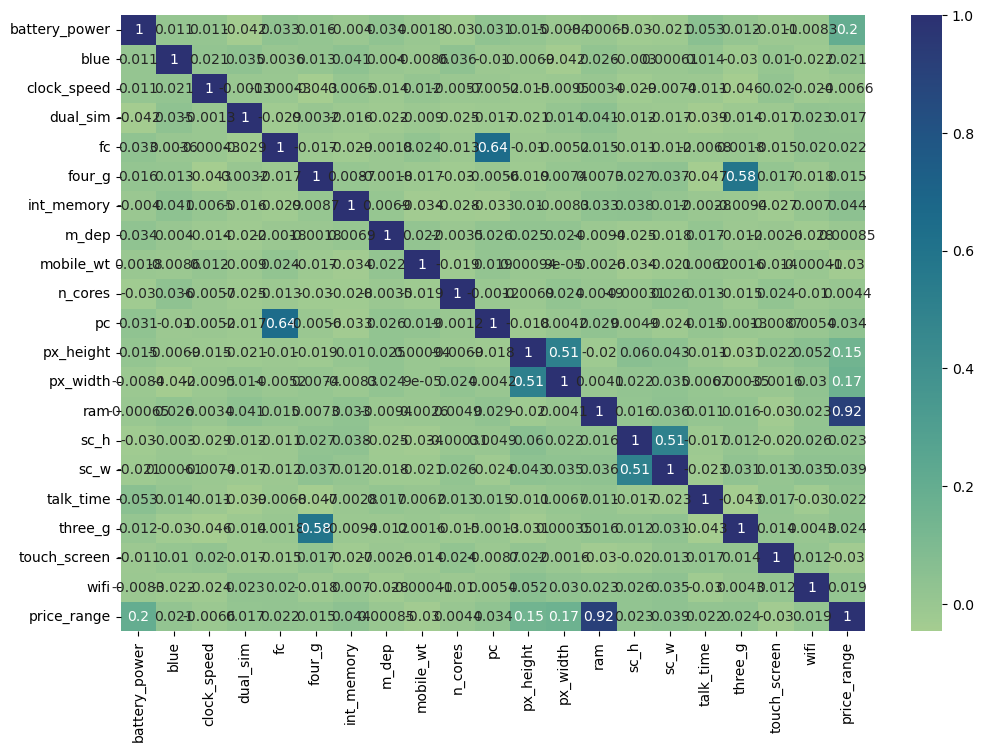

In [12]:
# Task 11:
# Create a heatmap of the correlation values for mobile_train data
plt.figure(figsize=[12,8])
sns.heatmap(correlation, annot=True, cmap='crest')

In [13]:
# Task 12:
# Generate the value counts of the label "price_range" for mobile_train data
mobile_train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Text(0.5, 1.0, 'Mobile Price Ranges')

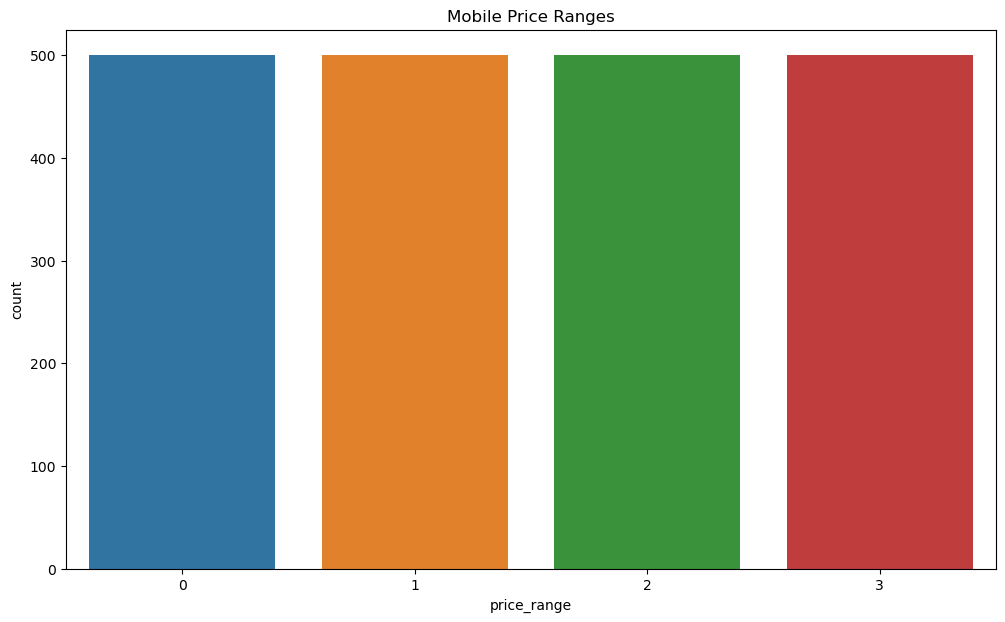

In [14]:
# Task 13:
# Produce a countplot using seaborn for label "price_range"
plt.figure(figsize=(12,7))
sns.countplot(data=mobile_train, x='price_range')
plt.title('Mobile Price Ranges')

Text(0.5, 1.0, 'Number of Cores')

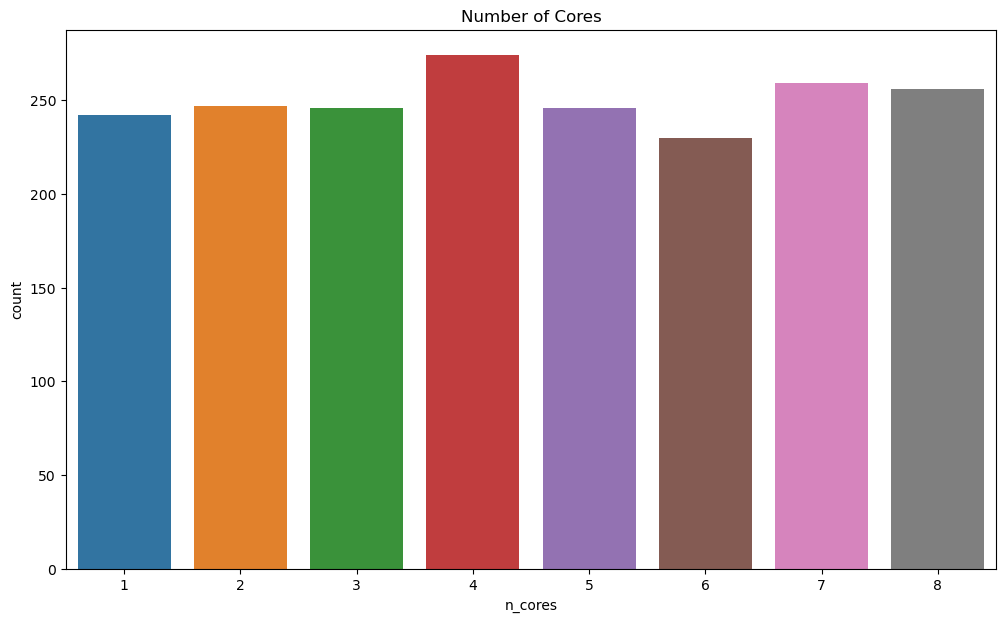

In [15]:
# Task 14:
# Generate a counplot from mobile_train data showing number of cores i.e. "n_cores" on x-axis
plt.figure(figsize=(12,7))

sns.countplot(data=mobile_train, x='n_cores')
plt.title('Number of Cores')

Text(0.5, 1.0, 'Number of Cores')

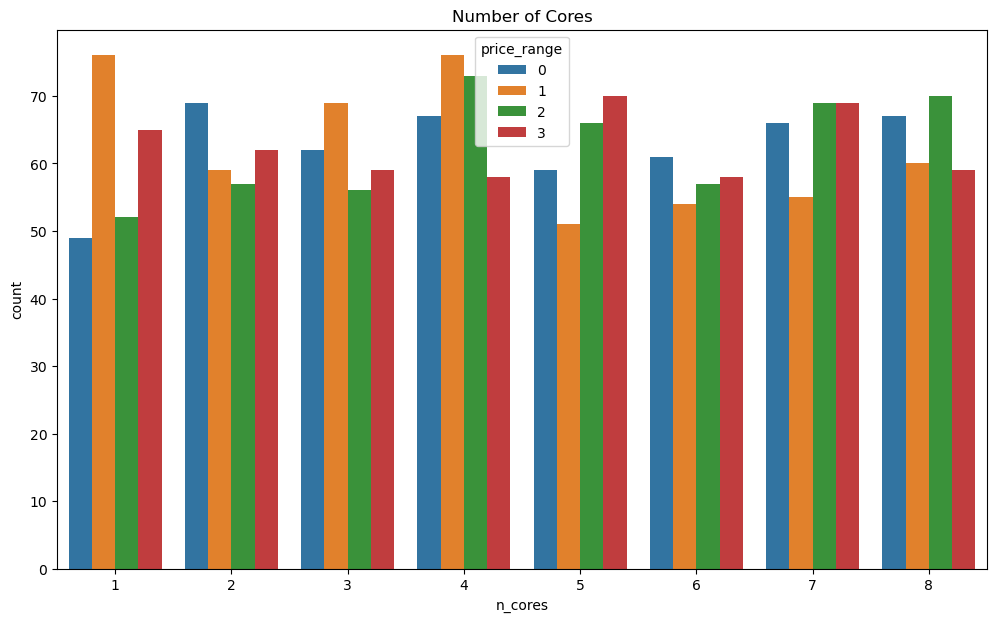

In [16]:
# Task 15:
# Generate a countplot from mobile_train with number of cores on x-axis and price range as hue
plt.figure(figsize=(12,7))

sns.countplot(data=mobile_train, x='n_cores', hue='price_range')
plt.title('Number of Cores')

<Axes: xlabel='mobile_wt', ylabel='Count'>

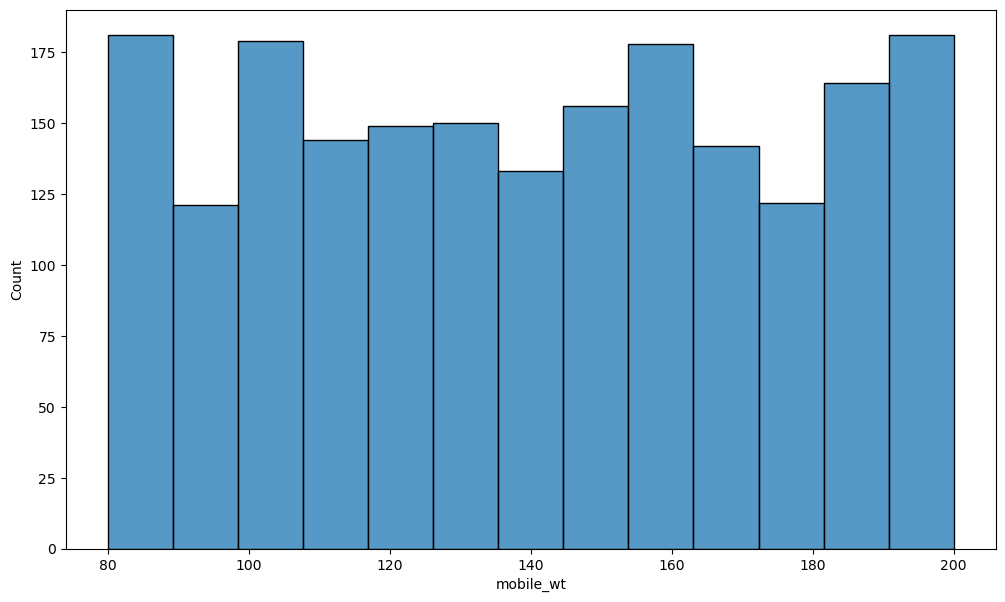

In [17]:
# Task 16: 
# Generate a histogram of the mobile weights i.e. "mobile_wt"
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='mobile_wt')

<Axes: xlabel='mobile_wt', ylabel='Count'>

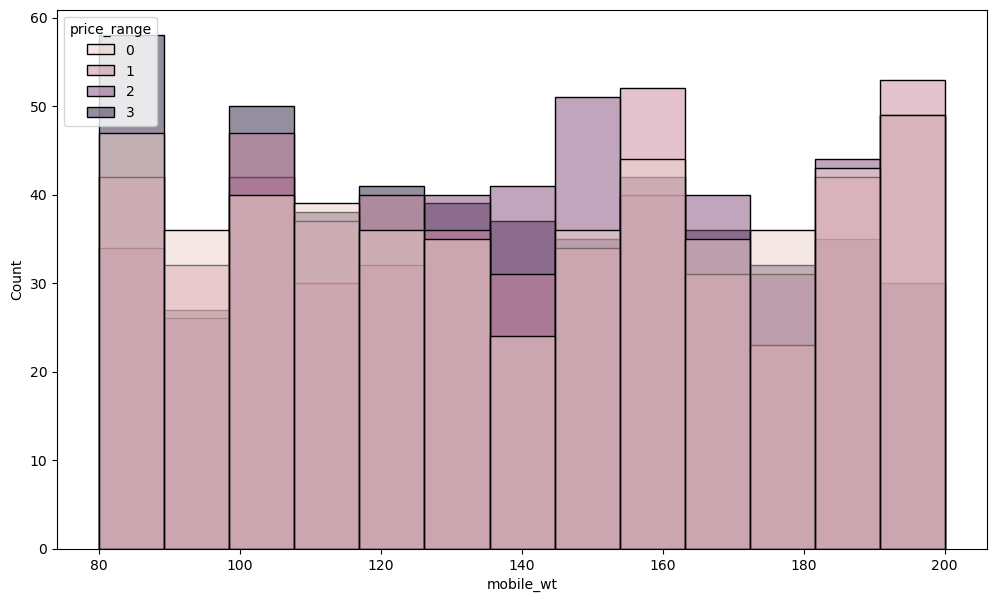

In [18]:
# Task 17:
# Make a histogram of "mobile_wt" with hue set to "price_range"
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='mobile_wt', hue='price_range')

<Axes: xlabel='ram', ylabel='Count'>

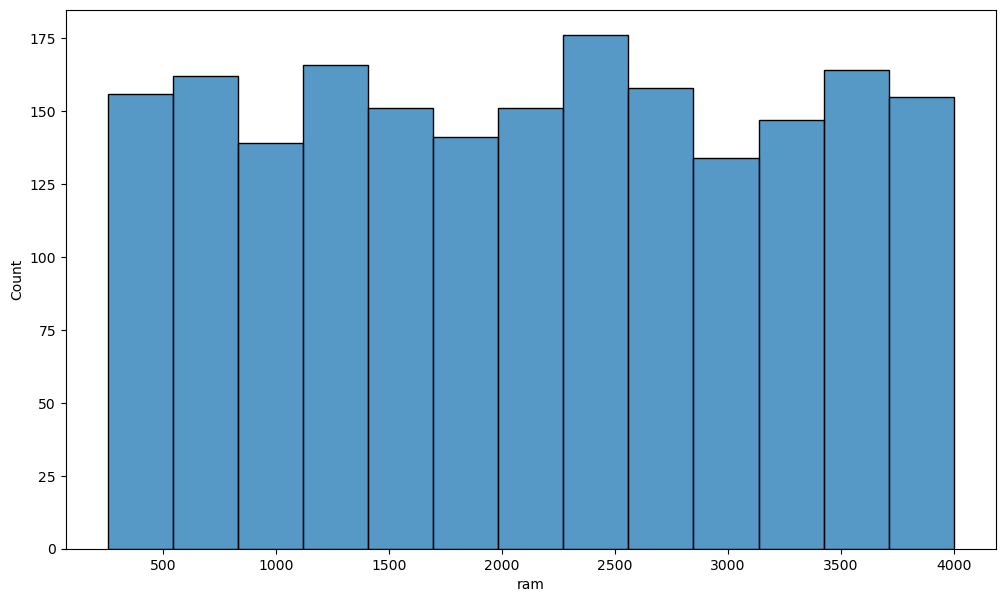

In [19]:
# Task 18:
# Make a histogram of the "ram" variable
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='ram')

<Axes: xlabel='ram', ylabel='Count'>

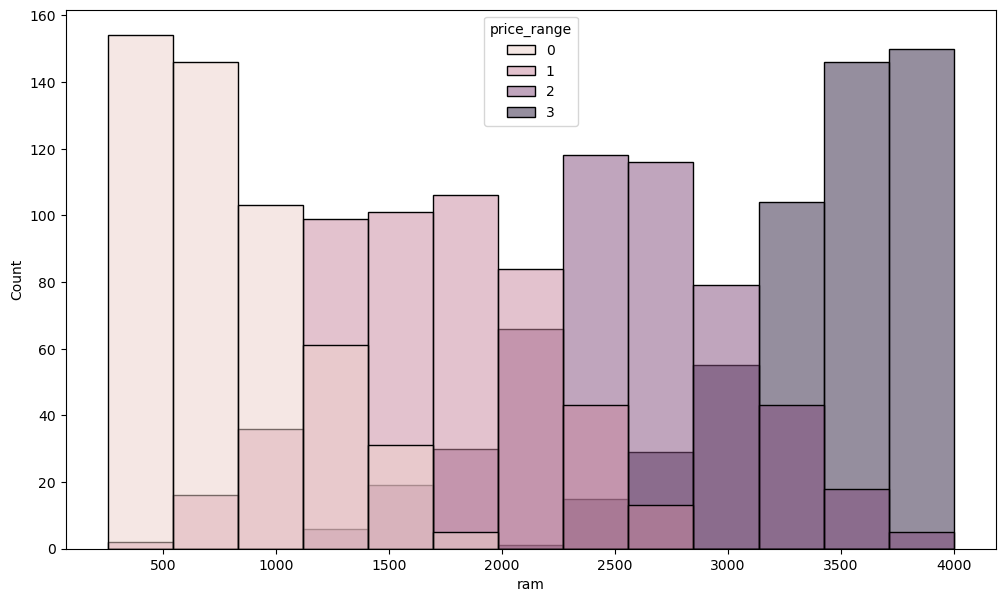

In [20]:
# Task 19:
# Make a historgram of "ram" with hue as "price_range"
plt.figure(figsize=(12,7))

sns.histplot(data=mobile_train, x='ram', hue='price_range')

<Axes: xlabel='n_cores', ylabel='ram'>

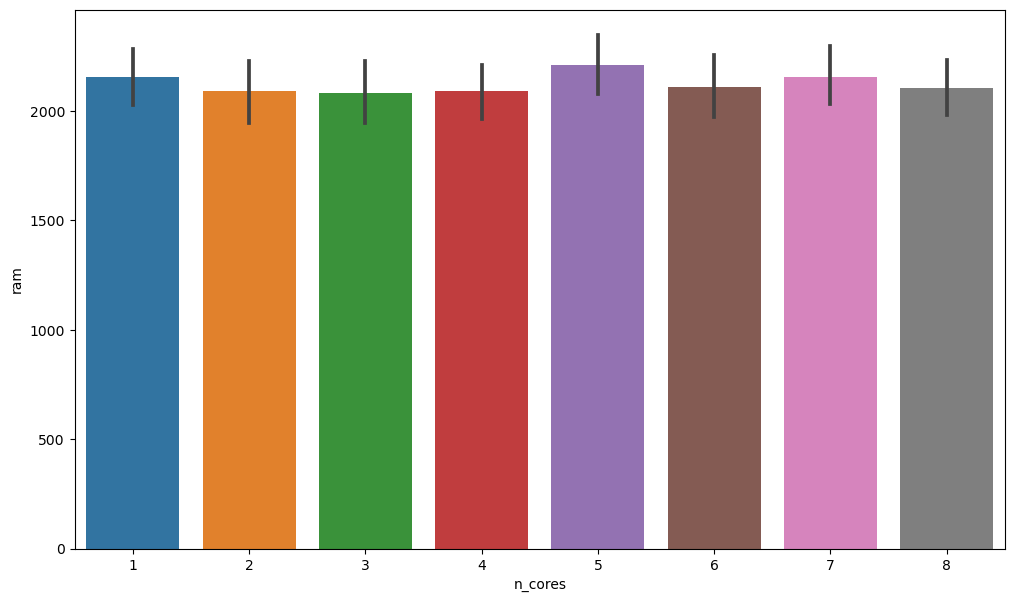

In [21]:
# Task 20:
# Make a barplot with x = "n_cores" and y="ram"
plt.figure(figsize=(12,7))

sns.barplot(data=mobile_train, x='n_cores', y='ram')

<Axes: ylabel='blue'>

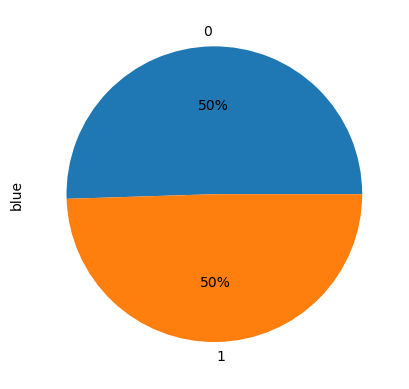

In [22]:
# Task 21:
# Display number of phones which have or don't have bluetooth as a pie chart
blue_count = mobile_train['blue'].value_counts()

blue_count.plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='dual_sim'>

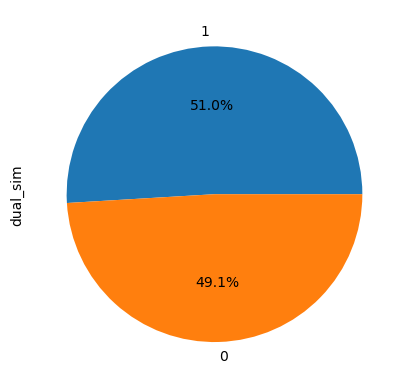

In [23]:
# Task 22:
# Display number of phones which have or don't have dual simcards as pie chart
sim_count = mobile_train['dual_sim'].value_counts()

sim_count.plot(kind='pie', autopct='%1.01f%%')

<Axes: ylabel='three_g'>

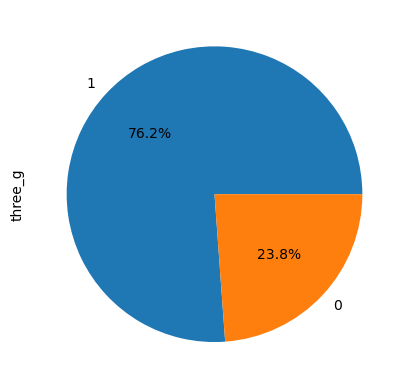

In [24]:
# Task 23:
# Display number of phones which have or don't have 3g as pie chart
count_3g = mobile_train['three_g'].value_counts()

count_3g.plot(kind='pie', autopct='%1.01f%%')

<Axes: ylabel='four_g'>

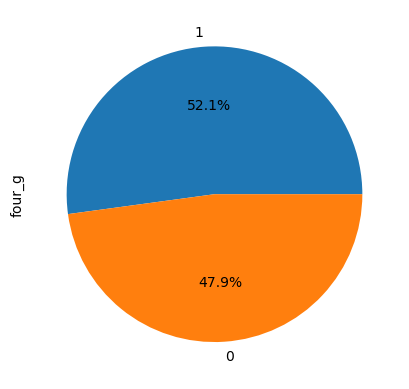

In [25]:
# Task 24:
# Display number of phones which have or don't have 3g as pie chart
count_4g = mobile_train['four_g'].value_counts()

count_4g.plot(kind='pie', autopct='%1.01f%%')

<Axes: ylabel='touch_screen'>

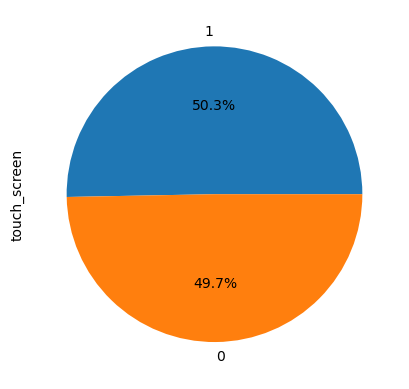

In [26]:
# Task 24:
# Display number of phones which have or don't have touchscreen as pie chart
touch_scr = mobile_train['touch_screen'].value_counts()

touch_scr.plot(kind='pie', autopct='%1.01f%%')

In [27]:
# Task 25:
# Divide your training data i.e. mobile_train into "training_input_data" and 
# "training_label" by using drop method. Remmber that "price_range" is your label.

training_input_data = mobile_train.drop('price_range', axis=1)
training_labels = mobile_train['price_range']

In [28]:
# Task 26:
# SInce there are no missing values or categorical features to be encoded, we 
# will only perform scaling.
# Design a pipeline for performing Min-Max Scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

my_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

In [29]:
# Task 27:
# Obtain "training_input_data_preprocessed" by applying the pipeline to 
# "training_input_data"
training_input_data_preprocessed = my_pipeline.fit_transform(training_input_data)

In [33]:
# Task 28:
# Create a LogisticRegression model named log_model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model

LogisticRegression()

In [34]:
# Task 29:
# Fit or train the model with training_input_data_preprocessed and training_labels
log_model.fit(training_input_data_preprocessed, training_labels)

LogisticRegression()

In [35]:
# Task 30:
# Evaluate the score of the trained model
log_model.score(training_input_data_preprocessed, training_labels)

0.947

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Task 31:
# Use cross validation to create log_scores for 10 subsets
from sklearn.model_selection import cross_val_score
log_scores = cross_val_score(log_model, training_input_data_preprocessed, 
                             training_labels, cv=10)

In [45]:
# Task 32:
# Determine mean of the log_scores
log_scores.mean()

0.9245000000000001

In [46]:
# Task 33:
# Predict the labels (output_labels_pred) for training_input_data_preprocessed using corss validation prediction
# and keep the number of folds 10

from sklearn.model_selection import cross_val_predict
training_labels_pred = cross_val_predict(log_model, training_input_data_preprocessed,
                                       training_labels, cv=10)

### Confusion Matrix
Confusion matrix is made of 4 main elements: True negatives, false negatives, true positives, and false positives.

True Positives(TP): Number of samples that are correctly classified as positive, and their actual label is positive.

False Positives (FP): Number of samples that are incorrectly classified as positive, when in fact their actual label is negative.

True Negatives (TN): Number of samples that are correctly classified as negative, and their actual label is negative.

False Negatives (FN): Number of samples that are incorrectly classified as negative, when in fact their actual label is positive.

In [49]:
# Task 34:
# Determine the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(training_labels, training_labels_pred)

array([[488,  12,   0,   0],
       [ 31, 441,  28,   0],
       [  0,  35, 430,  35],
       [  0,   0,  10, 490]], dtype=int64)

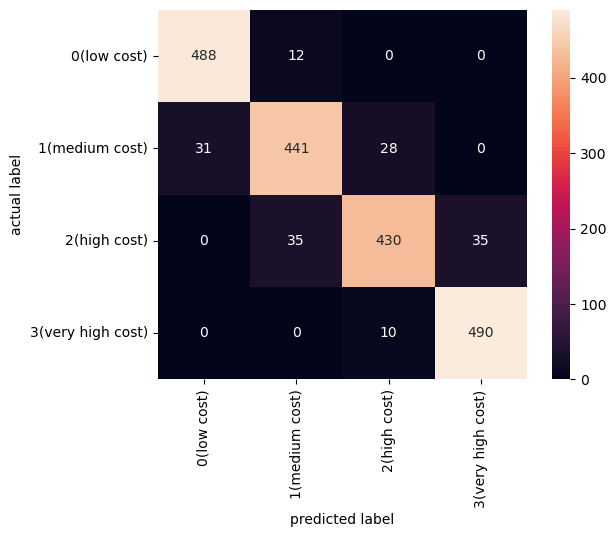

In [52]:
# Task 35:
# Generate a heatmap of confusion_matrix
cm = confusion_matrix(training_labels, training_labels_pred)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'],
                        yticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

### Precision 
“Out of all the positive predictions we made, how many were true?”


$P = \frac{TP}{TP+FP}$

### Recall
“Out of all the data points that should be predicted as true, how many did we correctly predict as true?”

‍
$R = \frac{TP}{TP+FN}$


### F1 Score
F1 Score is a measure that combines recall and precision.


$F1 = 2.\frac{P*R}{P+R}$

In [53]:
# Task 36:
# What is the accuracy of the model?
from sklearn.metrics import accuracy_score

accuracy_score(training_labels, training_labels_pred)

0.9245

In [56]:
# Task 37:
# Determine the precision, recall and f1 score
from sklearn.metrics import classification_report

print(classification_report(training_labels, training_labels_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       500
           1       0.90      0.88      0.89       500
           2       0.92      0.86      0.89       500
           3       0.93      0.98      0.96       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

